In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_EffNet5_b5_1FC_cross_15AB_15AB.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

/home/yupaporn/miniconda3/envs/usai/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/yupaporn/miniconda3/envs/usai/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [19]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FeaturesVector_Test_Experimaent.csv')
# X_test = dataframe.iloc[:,1:2049]
# y_test = dataframe.iloc[:,2052]
# print(X_test.shape)
# print(y_test.shape)

In [20]:
Normal=dataframe[dataframe['Class']=='Normal']
Abnormal=dataframe[dataframe['Class']=='Abnormal']

### Abnormal

In [21]:
dataframe.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,sub_class,views,Sub_class
0,0,-0.007468,0.339954,0.078500,-0.178511,0.382226,-0.153283,0.152363,-0.239746,-0.221379,...,-0.092671,-0.087188,0.171170,-0.132838,0.593847,-0.044348,Abnormal,AB01,FP-A,P1
1,1,0.023784,0.435393,0.032264,0.003498,0.641954,-0.216701,0.192723,-0.222552,-0.157848,...,0.021686,-0.120361,-0.116637,-0.115020,0.513775,-0.094137,Abnormal,AB01,FP-B,P42
2,2,0.694169,0.152337,-0.194394,-0.141714,-0.039730,0.117847,0.059118,-0.010946,-0.174467,...,-0.061826,-0.133808,0.296670,0.077594,0.373410,0.056262,Abnormal,AB01,FP-C,P52
3,3,0.268454,0.174427,0.252507,-0.159585,0.186359,-0.119375,0.014231,-0.141780,-0.133312,...,-0.125464,0.221550,0.142467,-0.031251,-0.095766,-0.059904,Abnormal,AB02,FP-A,P1
4,4,0.379375,0.108010,-0.098467,-0.175970,0.097317,-0.089237,0.110147,-0.189555,-0.099527,...,-0.141110,-0.033206,0.083165,-0.129062,0.372792,-0.063717,Abnormal,AB02,FP-B,P31


In [25]:
X_test = Abnormal.iloc[:,1:2049]
y_test = Abnormal.iloc[:,2050]
print(X_test.shape)
print(y_test.shape)

(42, 2048)
(42,)


In [26]:
print(y_test[0])

AB01


In [31]:
# y_prob = model.predict_proba(X_test)

In [32]:
# np.argmax(y_prob[10])

In [27]:
labels = {0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}

In [34]:
pred_list = list()
prob_list = list()
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
for i in range(0,len(y_prob)):
    result = y_prob[i]
    re_class = list()
    re_prop = list()  
    while len(re_class) <3:
        maxx = np.argmax(result)
        re_class.append(labels[maxx])
        re_prop.append(result[maxx])
        result = np.where(result==result[maxx], 0, result)
    pred_list.append(re_class)
    prob_list.append(re_prop)

In [35]:
pred_list[0]

['AB02', 'AB01', 'AB082']

In [36]:
prob_list[0]


[0.556201145840666, 0.17140998842870375, 0.07011816565326738]

In [37]:
Abnormal['category'] = pred_list
Abnormal['Prob'] = prob_list

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
ress = list()
ress_class = list()
for i in range(0,len(Abnormal)):
    if Abnormal['Sub_class'].tolist()[i] in Abnormal['category'].tolist()[i]:
        res = 1
    else:
        res = 0
    ress.append(res)
Abnormal['Pred'] = ress

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [39]:
Abnormal.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2045,2046,2047,Class,sub_class,views,Sub_class,category,Prob,Pred
0,0,-0.007468,0.339954,0.078500,-0.178511,0.382226,-0.153283,0.152363,-0.239746,-0.221379,...,-0.132838,0.593847,-0.044348,Abnormal,AB01,FP-A,P1,"[AB02, AB01, AB082]","[0.556201145840666, 0.17140998842870375, 0.070...",0
1,1,0.023784,0.435393,0.032264,0.003498,0.641954,-0.216701,0.192723,-0.222552,-0.157848,...,-0.115020,0.513775,-0.094137,Abnormal,AB01,FP-B,P42,"[AB02, AB01, Normal]","[0.5417066801042656, 0.2356167889225129, 0.036...",0
2,2,0.694169,0.152337,-0.194394,-0.141714,-0.039730,0.117847,0.059118,-0.010946,-0.174467,...,0.077594,0.373410,0.056262,Abnormal,AB01,FP-C,P52,"[AB01, Normal, AB082]","[0.8384973665177791, 0.04188113535782297, 0.02...",0
3,3,0.268454,0.174427,0.252507,-0.159585,0.186359,-0.119375,0.014231,-0.141780,-0.133312,...,-0.031251,-0.095766,-0.059904,Abnormal,AB02,FP-A,P1,"[AB02, AB01, Normal]","[0.46361417687049844, 0.21239834970726082, 0.0...",0
4,4,0.379375,0.108010,-0.098467,-0.175970,0.097317,-0.089237,0.110147,-0.189555,-0.099527,...,-0.129062,0.372792,-0.063717,Abnormal,AB02,FP-B,P31,"[AB01, AB02, Normal]","[0.5610098794166729, 0.11317097029066689, 0.05...",0


### Normal

In [41]:
X_test = Normal.iloc[:,1:2049]
y_test = Normal.iloc[:,2050]
print(X_test.shape)
print(y_test.shape)

(108, 2048)
(108,)


In [42]:
y_pred = model.predict(X_test)

In [43]:
prob_list = list()
y_prob = model.predict_proba(X_test)
for i in range(0,len(y_prob)):
    result = y_prob[i]
    re_prop = list()
    maxx = np.argmax(result)
    re_prop.append(result[maxx])
    prob_list.append(re_prop)

In [44]:
Normal['category'] = y_pred
Normal['Prob'] = prob_list

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
ress = list()
ress_class = list()
for i in range(0,len(Normal)):
    if Normal['Sub_class'].tolist()[i] == Normal['category'].tolist()[i]:
        res = 0
    else:
        res = 1
    ress.append(res)
Normal['Pred'] = ress

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [46]:
Normal.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2045,2046,2047,Class,sub_class,views,Sub_class,category,Prob,Pred
42,42,0.106348,0.473400,-0.149458,-0.155440,0.445358,0.334737,-0.050045,0.082079,-0.016057,...,0.528739,0.169019,0.728107,Normal,Normal,FP-A,P1,Normal,[0.9930796370967743],1
43,43,0.083586,0.192579,-0.150493,-0.006405,0.274405,-0.046651,0.417429,0.265573,0.389936,...,0.035569,0.136989,0.352287,Normal,Normal,FP-A,P1,Normal,[0.9451233575363903],1
44,44,0.858896,1.035495,-0.202204,0.118599,0.623216,-0.136747,0.796293,0.754570,0.107795,...,0.626649,0.305392,0.942076,Normal,Normal,FP-A,P1,Normal,[0.9975],1
45,45,0.145664,0.175788,-0.164932,-0.153846,-0.131342,0.493277,0.149500,0.196442,0.115504,...,0.077064,0.280627,0.760364,Normal,Normal,FP-A,P1,Normal,[0.9109623910966161],1
46,46,0.466295,-0.053033,-0.139610,-0.175783,0.234734,0.006159,0.278315,0.198044,0.211481,...,0.496372,-0.089537,0.416690,Normal,Normal,FP-A,P1,Normal,[0.9800427932828761],1


In [47]:
frames = [Abnormal, Normal]
dataframe = pd.concat(frames)

In [48]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['Pred'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = act= data_train['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
print('Actual : ',len(classe))
print(classe)

Predicted :  2
{0, 1}
Actual :  150
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


In [58]:
import numpy as np
from sklearn.metrics import confusion_matrix
act =data_train['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
pred = data_train['Pred'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 96.4939024390244%
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       429
           1       0.97      0.93      0.95       227

    accuracy                           0.96       656
   macro avg       0.97      0.96      0.96       656
weighted avg       0.97      0.96      0.96       656



Text(0.5, 21.5, 'Predicted label')

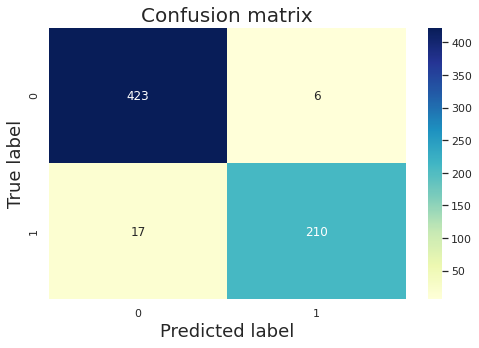

In [59]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)